In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# === Regional proxies ===
tickers = {
    'UK': 'VUKE.L',                # Vanguard FTSE UK All Share (London)
    'US': '^GSPC',                 # S&P 500
    'Europe_ex_UK': 'IEV',         # S&P Europe ex UK
    'Emerging': 'IEMG',            # MSCI EM
    'Japan': 'EWJ',                # MSCI Japan
    'Asia_ex_Japan': 'AAXJ'        # MSCI AC Asia ex Japan
}

In [3]:
# Date range
start = '2010-01-01'
end   = '2025-12-31'

# Download data
prices = yf.download(list(tickers.values()), start=start, end=end, auto_adjust=True)['Close']
prices.columns = list(tickers.keys())

# Monthly returns
monthly = prices.resample('M').last().pct_change().dropna()

[*********************100%***********************]  6 of 6 completed
C:\Users\jones\AppData\Local\Temp\ipykernel_41816\2121444885.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = prices.resample('M').last().pct_change().dropna()


In [4]:
# === Portfolio definitions ===
orig_alloc = {
    'UK':0.30, 'US':0.40,
    'Europe_ex_UK':0.15, 'Emerging':0.10,
    'Japan':0.03, 'Asia_ex_Japan':0.02
}

In [5]:
new_alloc  = {
    'UK':0.25, 'US':0.45,
    'Europe_ex_UK':0.10, 'Emerging':0.12,
    'Japan':0.05, 'Asia_ex_Japan':0.03
}

In [6]:
# Portfolio returns
orig_ret = monthly.dot(pd.Series(orig_alloc))
new_ret  = monthly.dot(pd.Series(new_alloc))

In [7]:
# Cumulative returns
orig_cum = (1 + orig_ret).cumprod()
new_cum  = (1 + new_ret).cumprod()

In [8]:
# Metrics
def metrics(series):
    total_return = series.iloc[-1] - 1
    years = len(series)/12
    ann_return = series.iloc[-1]**(1/years) - 1
    ann_vol  = series.pct_change().dropna().std() * np.sqrt(12)
    drawdowns = series.cummax() - series
    max_dd = drawdowns.max()
    return total_return, ann_return, ann_vol, max_dd

In [9]:
orig_m = metrics(orig_cum)
new_m  = metrics(new_cum)

print("Original Portfolio (2010-2025):")
print("Total Ret, Annualised Ret, Ann Vol, Max DD", orig_m)
print("\nGrowth-Optimised Portfolio (2010-2025):")
print("Total Ret, Annualised Ret, Ann Vol, Max DD", new_m)

Original Portfolio (2010-2025):
Total Ret, Annualised Ret, Ann Vol, Max DD (np.float64(1.5661061430292764), np.float64(0.07419752665607193), np.float64(0.1336305852051471), np.float64(0.5969026719003669))

Growth-Optimised Portfolio (2010-2025):
Total Ret, Annualised Ret, Ann Vol, Max DD (np.float64(1.6651387827370114), np.float64(0.07729129751700414), np.float64(0.1302853305072712), np.float64(0.5757486168912844))


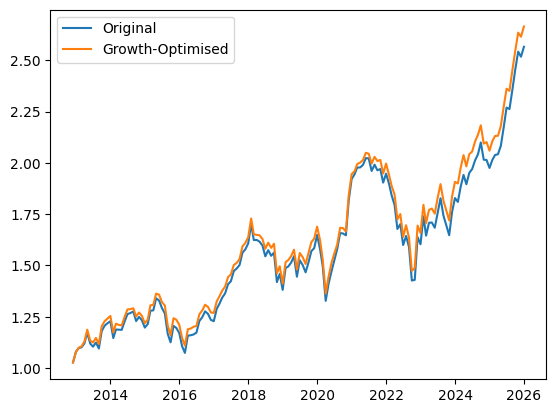

In [10]:
plt.plot(orig_cum, label="Original")
plt.plot(new_cum,  label="Growth-Optimised")
plt.legend()
plt.show()
